## 0. Intro

- This is a notebook that makes accessment for how good are classic methods to solve the Image Resolution Problem.

There are 3 classic famous methods:
- Nearest Neighbor Interpolation
- Bilinear
- Bicubic

Datasets to measure are:
- Set5
- Set14
- B100

In [ ]:
!pip install datasets==2.15 super-image

In [ ]:
import datasets
datasets.__version__

'2.15.0'

In [ ]:
from datasets import load_dataset
from super_image import EdsrModel
from super_image.data import EvalDataset, EvalMetrics

scale = 4
bicubic_scale = "bicubic_x" + str(scale)

set5 = load_dataset('eugenesiow/Set5', bicubic_scale, split='validation')
set14 = load_dataset('eugenesiow/Set14', bicubic_scale, split='validation')
b100 = load_dataset('eugenesiow/BSD100', bicubic_scale, split='validation')

eval_set5 = EvalDataset(set5)
eval_set14 = EvalDataset(set14)
eval_b100 = EvalDataset(b100)



## 1. Nearest Neighbor Interpolation

In [ ]:
import torch
from torch import nn

In [ ]:
nn_lr_list = []
nn_hr_list = []
class Nearest_Neighbor(nn.Module):
  def __init__(self, scale: int):
    super().__init__()
    self.scale = scale

  def forward(self, x: torch.Tensor):
    nn_lr_list.append(x.numpy()[0].transpose(1, 2, 0))
    x = nn.functional.interpolate(input = x, scale_factor = self.scale, mode='nearest')
    nn_hr_list.append(x.numpy()[0].transpose(1, 2, 0))
    return x

nearest_model = Nearest_Neighbor(scale)
print("Nearest Neighbor on Set5")
EvalMetrics().evaluate(nearest_model, eval_set5)
print("Nearest Neighbor on Set14")
EvalMetrics().evaluate(nearest_model, eval_set14)
print("Nearest Neighbor on BSD100")
EvalMetrics().evaluate(nearest_model, eval_b100)

Nearest Neighbor on Set5


Evaluating dataset:   0%|          | 0/5 [00:00<?, ?it/s]

scale:4      eval psnr: 26.30     ssim: 0.7387
Nearest Neighbor on Set14


Evaluating dataset:   0%|          | 0/14 [00:00<?, ?it/s]

scale:4      eval psnr: 24.86     ssim: 0.6592
Nearest Neighbor on BSD100


Evaluating dataset:   0%|          | 0/100 [00:00<?, ?it/s]

scale:4      eval psnr: 25.66     ssim: 0.6551


## 2. Bilinear Interpolation

In [ ]:
bil_lr_list = []
bil_hr_list = []
class Bilinear_Model(nn.Module):
  def __init__(self, scale: int):
    super().__init__()
    self.scale = scale

  def forward(self, x: torch.Tensor):
    bil_lr_list.append(x.numpy()[0].transpose(1, 2, 0))
    x = nn.functional.interpolate(input = x, scale_factor = self.scale, mode='bilinear')
    bil_hr_list.append(x.numpy()[0].transpose(1, 2, 0))
    return x

bilinear_model = Bilinear_Model(scale)
print("Bilinear on Set5")
EvalMetrics().evaluate(bilinear_model, eval_set5)
print("Bilinear on Set14")
EvalMetrics().evaluate(bilinear_model, eval_set14)
print("Bilinear on BSD100")
EvalMetrics().evaluate(bilinear_model, eval_b100)

Bilinear on Set5


Evaluating dataset:   0%|          | 0/5 [00:00<?, ?it/s]

scale:4      eval psnr: 27.60     ssim: 0.7903
Bilinear on Set14


Evaluating dataset:   0%|          | 0/14 [00:00<?, ?it/s]

scale:4      eval psnr: 25.64     ssim: 0.6865
Bilinear on BSD100


Evaluating dataset:   0%|          | 0/100 [00:00<?, ?it/s]

scale:4      eval psnr: 26.24     ssim: 0.6747


## 3. Bicubic Interpolation

In [ ]:
bic_lr_list = []
bic_hr_list = []
class Bicubic_Model(nn.Module):
  def __init__(self, scale: int):
    super().__init__()
    self.scale = scale

  def forward(self, x: torch.Tensor):
    # print(x.shape)
    bic_lr_list.append(x.numpy()[0].transpose(1, 2, 0))
    x = nn.functional.interpolate(input = x, scale_factor = self.scale, mode='bicubic')
    bic_hr_list.append(x.numpy()[0].transpose(1, 2, 0))
    return x

bicubic_model = Bicubic_Model(scale)
print("Bicubic on Set5")
EvalMetrics().evaluate(bicubic_model, eval_set5)
print("Bicubic on Set14")
EvalMetrics().evaluate(bicubic_model, eval_set14)
print("Bicubic on BSD100")
EvalMetrics().evaluate(bicubic_model, eval_b100)

Bicubic on Set5


Evaluating dataset:   0%|          | 0/5 [00:00<?, ?it/s]

scale:4      eval psnr: 28.68     ssim: 0.8145
Bicubic on Set14


Evaluating dataset:   0%|          | 0/14 [00:00<?, ?it/s]

scale:4      eval psnr: 26.36     ssim: 0.7133
Bicubic on BSD100


Evaluating dataset:   0%|          | 0/100 [00:00<?, ?it/s]

scale:4      eval psnr: 26.82     ssim: 0.7007


## 4. Lanczos Interpolation

In [ ]:
import cv2

In [ ]:
la_lr_list = []
la_hr_list = []
class Lanczos_Model(nn.Module):
  def __init__(self, scale: int):
    super().__init__()
    self.scale = scale

  def forward(self, x):
    x = x.numpy()
    img = x[0].transpose(1, 2, 0)
    la_lr_list.append(img)
    k = cv2.resize(img, None, fx=self.scale, fy=self.scale, interpolation=cv2.INTER_LANCZOS4)
    la_hr_list.append(k)
    # Convert back to tensor
    k = k.transpose(2, 0, 1)
    x = torch.tensor(k).unsqueeze(dim = 0)
    # print(x.shape)

    return x

lanczos_model = Lanczos_Model(scale)
print("Lanczos on Set5")
EvalMetrics().evaluate(lanczos_model, eval_set5)
print("Lanczos on Set14")
EvalMetrics().evaluate(lanczos_model, eval_set14)
print("Lanczos on BSD100")
EvalMetrics().evaluate(lanczos_model, eval_b100)

Lanczos on Set5


Evaluating dataset:   0%|          | 0/5 [00:00<?, ?it/s]

scale:4      eval psnr: 28.93     ssim: 0.8209
Lanczos on Set14


Evaluating dataset:   0%|          | 0/14 [00:00<?, ?it/s]

scale:4      eval psnr: 26.51     ssim: 0.7189
Lanczos on BSD100


Evaluating dataset:   0%|          | 0/100 [00:00<?, ?it/s]

scale:4      eval psnr: 26.95     ssim: 0.7060


## 5. Save Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
save_img_path = "/content/drive/MyDrive/ML_DM_project/saved_images"

In [ ]:
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set5
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set5/nearest_neighbor
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set5/bilinear
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set5/bicubic
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set5/lanczos

!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set14
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set14/nearest_neighbor
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set14/bilinear
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set14/bicubic
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/set14/lanczos

!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/b100
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/b100/nearest_neighbor
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/b100/bilinear
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/b100/bicubic
!mkdir /content/drive/MyDrive/ML_DM_project/saved_images/b100/lanczos

In [ ]:
from torchvision.utils import save_image

In [ ]:
set5_path = "/content/drive/MyDrive/ML_DM_project/saved_images/set5/"
set14_path = "/content/drive/MyDrive/ML_DM_project/saved_images/set14/"
b100_path = "/content/drive/MyDrive/ML_DM_project/saved_images/b100/"

In [ ]:
nn_lr_list[1].max()

0.99607843

In [ ]:
# save set5
for i in range(0, 5, 1):
  # hwc
  # 012
  # chw
  # 201
  #nn, bil, bic, la
  save_image(torch.from_numpy(nn_hr_list[i].transpose(2, 0, 1)), set5_path + "/nearest_neighbor/" + "nn_" + str(i+1) +".png")
  save_image(torch.from_numpy(bil_hr_list[i].transpose(2, 0, 1)), set5_path + "/bilinear/" + "bil_" + str(i+1) +".png")
  save_image(torch.from_numpy(bic_hr_list[i].transpose(2, 0, 1)), set5_path + "/bicubic/" + "bic_" + str(i+1) +".png")
  save_image(torch.from_numpy(la_hr_list[i].transpose(2, 0, 1)), set5_path + "/lanczos/" + "la_" + str(i+1) +".png")

In [ ]:
# save set14
for i in range(5, 19, 1):
  save_image(torch.from_numpy(nn_hr_list[i].transpose(2, 0, 1)), set14_path + "/nearest_neighbor/" + "nn_" + str(i-4) +".png")
  save_image(torch.from_numpy(bil_hr_list[i].transpose(2, 0, 1)), set14_path + "/bilinear/" + "bil_" + str(i-4) +".png")
  save_image(torch.from_numpy(bic_hr_list[i].transpose(2, 0, 1)), set14_path + "/bicubic/" + "bic_" + str(i-4) +".png")
  save_image(torch.from_numpy(la_hr_list[i].transpose(2, 0, 1)), set14_path + "/lanczos/" + "la_" + str(i-4) +".png")

In [ ]:
# save b100
for i in range(19, 119, 1):
  save_image(torch.from_numpy(nn_hr_list[i].transpose(2, 0, 1)), b100_path + "/nearest_neighbor/" + "nn_" + str(i-18) +".png")
  save_image(torch.from_numpy(bil_hr_list[i].transpose(2, 0, 1)), b100_path + "/bilinear/" + "bil_" + str(i-18) +".png")
  save_image(torch.from_numpy(bic_hr_list[i].transpose(2, 0, 1)), b100_path + "/bicubic/" + "bic_" + str(i-18) +".png")
  save_image(torch.from_numpy(la_hr_list[i].transpose(2, 0, 1)), b100_path + "/lanczos/" + "la_" + str(i-18) +".png")

## 6. Plot Images

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
def plot_index(index: int):
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))

    # List of titles for each subplot
    titles = ['NN LR', 'BIL LR', 'BIC LR', 'LA LR', 'NN HR', 'BIL HR', 'BIC HR', 'LA HR']

    # List of arrays for each subplot
    images = [
        nn_lr_list[index], bil_lr_list[index], bic_lr_list[index], la_lr_list[index],
        nn_hr_list[index], bil_hr_list[index], bic_hr_list[index], la_hr_list[index]
    ]

    for ax, img, title in zip(axes.flat, images, titles):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

# Example usage:


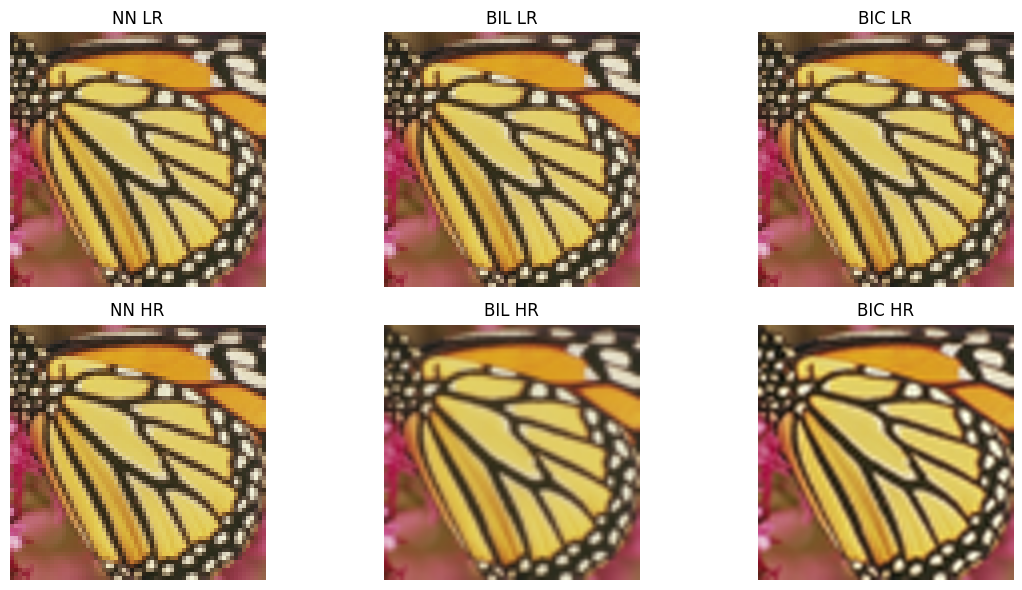

In [ ]:
plot_index(2)